In [374]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
from math import ceil

from IPython.display import Audio

In [375]:
# load a random audio file and display an audio player

d = "../datasets/birdsongs-combined/train_audio"
random_dir = f"{d}/{random.choice(os.listdir(d))}/"
random_file = random_dir + random.choice(os.listdir(random_dir))

random_file

'../datasets/birdsongs-combined/train_audio/rebnut/XC277522.ogg'

In [376]:
data, sample_rate_hz = librosa.load(random_file, sr=None)

In [377]:
data # sample values

array([1.1773754e-05, 1.3377055e-05, 1.4081760e-05, ..., 9.7078472e-02,
       1.4165361e-01, 6.2897064e-02], dtype=float32)

In [378]:
data.shape # total samples

(885691,)

In [379]:
sample_rate_hz # sample rate of file

32000

In [380]:
data.shape[0] / sample_rate_hz # duration of file

27.67784375

In [381]:
data_series = pd.Series(data) # for ease of use going forward
# convert index into seconds to make it easier
# divide by sample rate
data_series.index = data_series.index / sample_rate_hz
data_series

0.000000     0.000012
0.000031     0.000013
0.000063     0.000014
0.000094     0.000014
0.000125     0.000014
               ...   
27.677688    0.115705
27.677719    0.115392
27.677750    0.097078
27.677781    0.141654
27.677813    0.062897
Length: 885691, dtype: float32

In [382]:
def plot_audio(data_series: pd.Series, end: int = -1):
    plt.figure(figsize=(15,5))
    data_series.plot.line()
    plt.grid(axis="x") # no point showing y axis for grid lines
    #plt.xticks(np.linspace(0, ceil(max(data_series.index)), 10))
    plt.title(random_file)
    plt.xlabel("Time (secs)")
    plt.ylabel("Amplitude")
    plt.xlim((0, ceil(max(data_series.index)) if end == -1 else end)) # IN CASE DATA/INDEX IS TRIMMED. START AT 0 AND END ON WHOLE VALUE
    plt.show()

In [383]:
Audio(random_file)

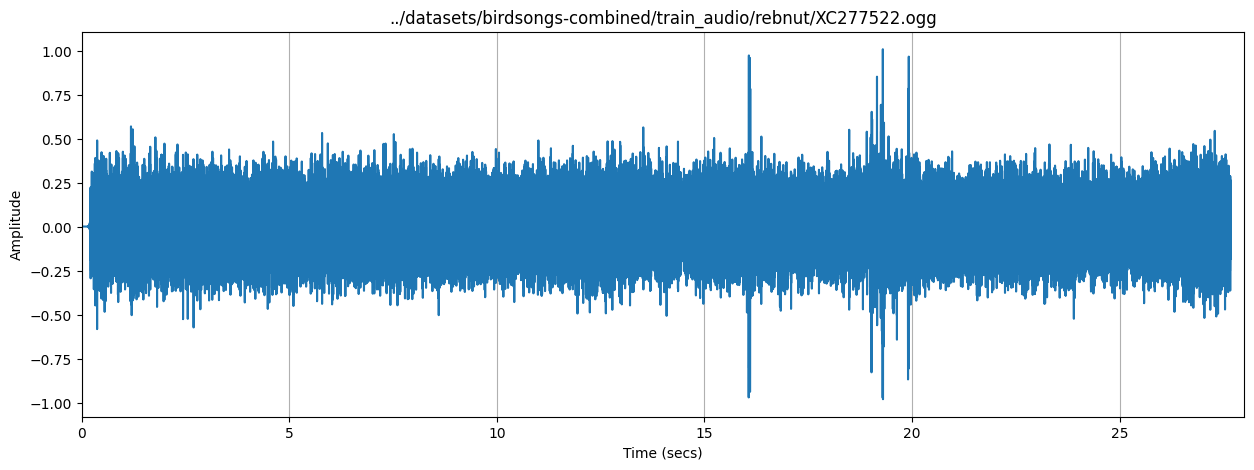

In [384]:
# original audio file

plot_audio(data_series)

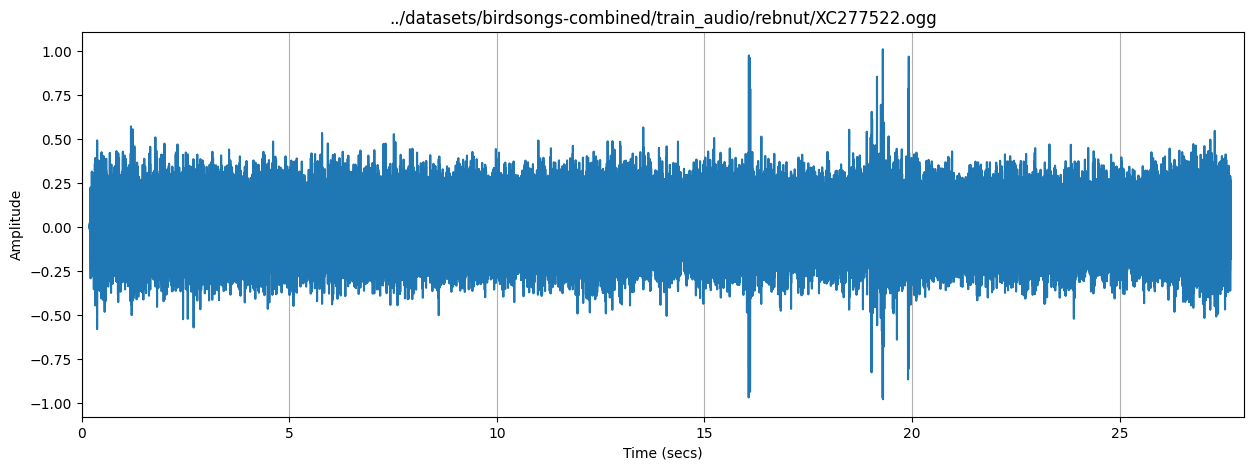

In [385]:
# trim to remove quiet/silent start/ends

data_trimmed, trim_index = librosa.effects.trim(data, top_db=20) # top_db = "silence" threshold. first value above this is when trimming STOPS. ref = root mean square of decibels if not defined
trim_index = trim_index / sample_rate_hz # scale index so that its in line with time sample
# first value = offset compared to original data. (set first index value in "data_trimmed" to this)
# second value = end of slice. should be maximum value of new offset data. if above ^ is done, 2nd value should be final value in index of data_trimmed

data_trimmed_series = pd.Series(data_trimmed)
data_trimmed_series.index = (data_trimmed_series.index / sample_rate_hz) + trim_index[0] # scale to match time, then offset trim value to ensure time is identical for each sample before the slice

plot_audio(data_trimmed_series, end = ceil(max(data_series.index)))

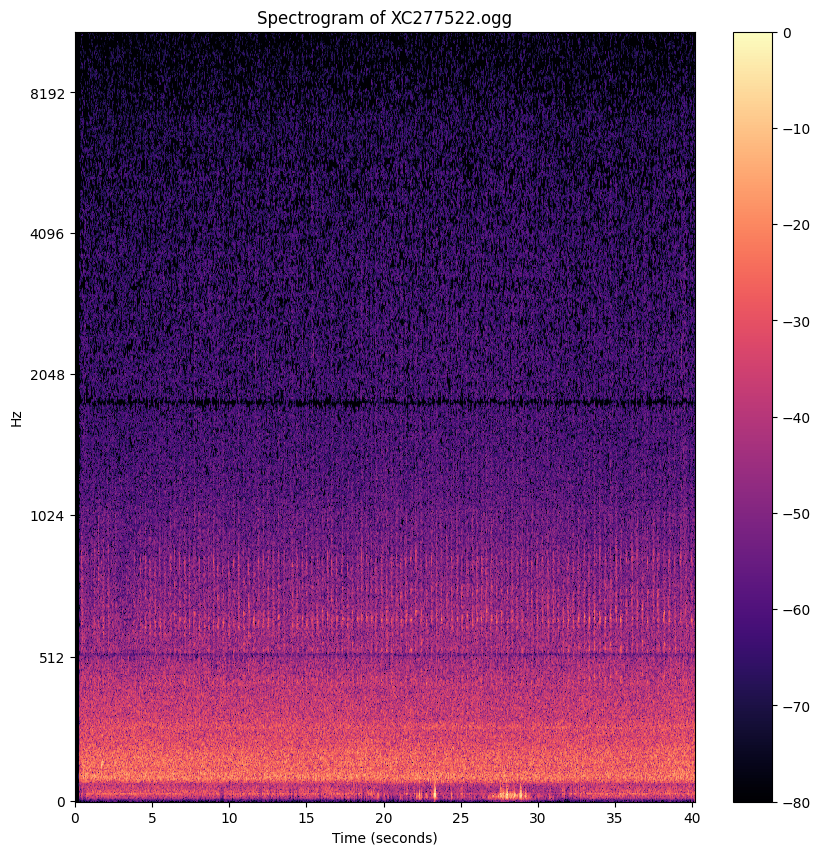

In [393]:
# spectrograms

data_transformed = librosa.stft(data) # applies short time fourier transform to data
# result is a list of complex values
# not interested in complex numbers, so take magnitude (NUMPY abs value) of numbers
# amplitude is not useful for visualisation, so convert amplitude to dB

spec_db = librosa.amplitude_to_db(np.abs(data_transformed), ref=np.max) # change/transform ref as you please

plt.figure(figsize=(10, 10))
librosa.display.specshow(spec_db, x_axis="s", y_axis="linear") # x-axis and y-axis can change e.g. "log", "linear", "s" (for seconds)
plt.colorbar()
plt.title(f"Spectrogram of {random_file.split("/")[-1]}")
plt.show()
# hover over function to display different types of display types